### Load Datasets

In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
from NN import NN
from util import compute_clean_data
import matplotlib.pyplot as plt 

# init datasets
full_train_X, full_train_Y = compute_clean_data("data/mnist_train.csv")
full_test_X, full_test_Y = compute_clean_data("data/mnist_test.csv")

mini_train_X, mini_train_Y = compute_clean_data("data/mnist_train_100.csv")
mini_test_X, mini_test_Y = compute_clean_data("data/mnist_test_10.csv")

half_train_X, half_train_Y = full_train_X[30000:], full_train_Y[30000:]
half_test_X, half_test_Y = full_test_X[5000:], full_test_Y[5000:]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define Train Function using Stochastic Gradient Descent

In [100]:
from util import randomize_order

def train(nn, epochs, lr, train_X, train_Y, valid_X, valid_Y, show_loss=True):
    # Set datasets
    nn.setAlpha(lr)
    nn.setTrainData(train_X, train_Y)
    nn.setTestData(valid_X, valid_Y)

    # Stochastic Gradient Descent 
    losses = []

    for _ in range(epochs):    
        # Randomize order of training data for this epoch
        X, Y  = randomize_order(nn.train_X, nn.train_Y)
        nn.setTrainData(train_X=X, train_Y=Y)

        # Train 
        avg_loss = nn.train(show_loss)
        losses.append(avg_loss)
    return losses

def plot_loss_over_epoch(losses, epochs):
    plt.title('Loss over epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(list(range(1, epochs + 1)), losses)
    plt.show()

### Find Optimal Learning Rate using K-Fold Cross Validation

In [102]:
# Initialize parameters 
test_X, test_Y = full_test_X, full_test_Y
X, Y = full_train_X, full_train_Y
batch_size = 10000
N = X.shape[0]
epochs = 5
show_loss = False 

# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.001,
    train_X=full_train_X,
    train_Y=full_train_Y,
)

alphas = [0.001, 0.005, 0.0075, 0.008, 0.01, 0.025]
losses = []
accs = []
for i, alpha in enumerate(alphas):
    nn.setAlpha(alpha)

    # Validation data
    valid_X = X.take(range(i, i + batch_size), axis=0, mode='wrap')
    valid_Y = Y.take(range(i, i + batch_size), axis=0, mode='wrap')

    # Train data 
    train_X = X.take(range(i + batch_size, i + N), axis=0, mode='wrap')
    train_Y = Y.take(range(i + batch_size, i + N), axis=0, mode='wrap')

    # Train network using current learning rate
    cur_losses = train(nn, epochs, alpha, train_X, train_Y, valid_X, valid_Y, show_loss)    
    avg_loss = sum(cur_losses) / epochs
    losses.append(avg_loss)

    # Test Network using newly learned weights 
    acc = nn.test()
    accs.append(acc)
    
    # Randomize weights between folds 
    nn.randomizeWeights()

Accuracy = 0.9108
Accuracy = 0.9351
Accuracy = 0.9487
Accuracy = 0.9408
Accuracy = 0.9469
Accuracy = 0.8374


### Visualize sata  

Optimal learning rate is 0.0075
An lr of 0.001 yielded 4.6191554790083496 loss and 91.08000000000001% accuracy.
An lr of 0.005 yielded 4.721635150320417 loss and 93.51% accuracy.
An lr of 0.0075 yielded 4.858628357828679 loss and 94.87% accuracy.
An lr of 0.008 yielded 4.896072492613568 loss and 94.08% accuracy.
An lr of 0.01 yielded 4.850562354860462 loss and 94.69% accuracy.
An lr of 0.025 yielded 5.334482274639939 loss and 83.74000000000001% accuracy.


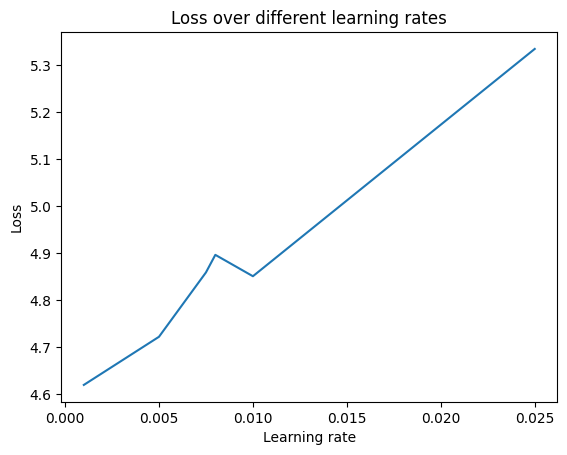

In [103]:
# Determine best learning rate 
opt_lr = alphas[accs.index(max(accs))]
print(f"Optimal learning rate is {opt_lr}")

for i in range(len(alphas)):
    print(f"An lr of {alphas[i]} yielded {losses[i]} loss and {accs[i] * 100}% accuracy.")

# Visualize loss over learning rate
plt.title('Loss over different learning rates')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.plot(alphas, losses)
plt.show()

### Train and test todel using optimal learning rate

Loss on iteration 10000 = 4.107067194401984
Loss on iteration 20000 = 5.105434880503086
Loss on iteration 30000 = 4.707999905468681
Loss on iteration 40000 = 5.931872864102646
Loss on iteration 50000 = 5.470347614391453
Loss on iteration 60000 = 5.532090879699101
Loss on iteration 10000 = 4.386179986539403
Loss on iteration 20000 = 3.445323107433115
Loss on iteration 30000 = 4.018358502725334
Loss on iteration 40000 = 4.052620385122032
Loss on iteration 50000 = 5.538295495198417
Loss on iteration 60000 = 3.167904352276196
Loss on iteration 10000 = 5.580977206355013
Loss on iteration 20000 = 5.458013747086074
Loss on iteration 30000 = 5.255068465095304
Loss on iteration 40000 = 4.557260342003944
Loss on iteration 50000 = 4.554163442169192
Loss on iteration 60000 = 5.982542247570149
Loss on iteration 10000 = 6.881971467501953
Loss on iteration 20000 = 3.9254148127631385
Loss on iteration 30000 = 6.988027156658808
Loss on iteration 40000 = 5.843562838510733
Loss on iteration 50000 = 3.185

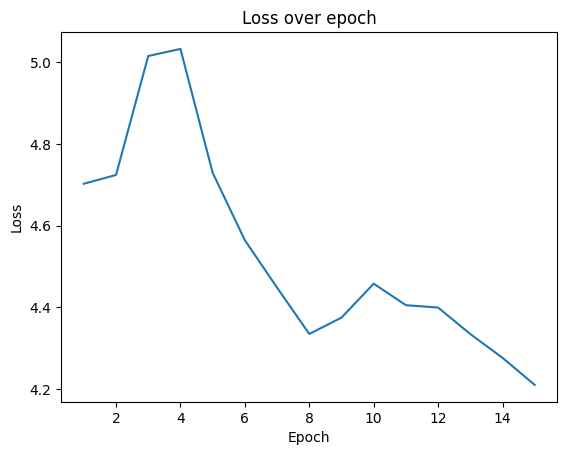

Accuracy = 0.9605


In [105]:
# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=opt_lr,
    train_X=full_train_X,
    train_Y=full_train_Y,
    test_X=full_test_X,
    test_Y=full_test_Y
)
epochs = 15

# Train network using optimal learning rate 
losses = train(
        nn=nn, 
        epochs=epochs, 
        lr=opt_lr, 
        train_X=full_train_X, 
        train_Y=full_train_Y, 
        valid_X=full_test_X, 
        valid_Y=full_test_Y
    )

# Visualize loss during training
plot_loss_over_epoch(losses, epochs)

# Determine accuracy of the network 
acc = nn.test()


### Extension: Training Data Interpolation

In this section we'll make the model more accurate by rotating images and zooming them in/out. This will allow the model to account for more variance in human hand writing. Overall, the goal will be to make the model suitable for the [demo site](https://number-guesser-efbea.web.app/), where users can draw digits however they please. 

In [141]:
"""
First we load datasets without scaling the inputs 
because we for each input, we will apply a combination 
of zoom, translate, and/or a rotate operation before 
scaling. 
"""

interp_train_X, interp_train_Y = compute_clean_data("data/mnist_train.csv", scale=False)

In [140]:
"""
Define operations
"""

from scipy import ndimage 

def rotate_img(orig: np.ndarray) -> np.ndarray:
    if np.random.choice([True, False]):
        degrees = np.random.randint(-20, -9)
    else:
        degrees = np.random.randint(10, 21)
    return ndimage.rotate(orig.reshape(28, 28), degrees, cval=0.01, reshape=False).reshape(784)

"""
credit: https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without
        -changing-its-dimensions
"""
def zoom(img: np.ndarray):
    zoom_factor = np.random.uniform(0.5, 0.8)

    img = img.reshape(28, 28)
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:
        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = ndimage.zoom(img, zoom_tuple)
    
    # Zooming in
    elif zoom_factor > 1:
        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = ndimage.zoom(img[top:top+zh, left:left+zw], zoom_tuple)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out.reshape(784)

def translate(orig: np.ndarray) -> np.ndarray:
    shift = np.random.randint(-9, 9, size=2)
    return ndimage.shift(orig.reshape(28, 28), shift=shift, cval=0.01).reshape(784)

def interpolate(img: np.ndarray) -> np.ndarray:
    ops = {
        1: rotate_img,
        2: zoom,
        3: translate,
    }
    order = [1, 2, 3]
    np.random.shuffle(order)
    
    img = ops[order[0]](img)
    img = ops[order[1]](img)
    img = ops[order[2]](img)
    
    return img

In [143]:
"""
Generate new training data
"""
from util import scale_vector

interp_X = []
interp_Y = []

for i, x in enumerate(interp_train_X):
    interp_X.append(scale_vector(x))
    interp_Y.append(interp_train_Y[i])
    for _ in range(3):
        interp_X.append(scale_vector(interpolate(x)))
        interp_Y.append(interp_train_Y[i])

interp_X = np.asarray(interp_X)
interp_Y = np.asarray(interp_Y)

print(interp_X.shape)
print(interp_Y.shape)


(240000, 784)
(240000, 10)


In [155]:
"""
Train with new dataset 
"""

# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.0075,
    train_X=interp_X,
    train_Y=interp_Y,
    test_X=full_test_X,
    test_Y=full_test_Y
)

# lower number of epochs as training dataset is 4 times bigger 
epochs = 10 

# Train network using optimal learning rate 
losses = train(
        nn=nn, 
        epochs=epochs, 
        lr=0.0075, 
        train_X=interp_X, 
        train_Y=interp_Y, 
        valid_X=full_test_X, 
        valid_Y=full_test_Y
    )

Loss on iteration 40000 = 2.5269001352590656
Loss on iteration 80000 = 2.739468642988827
Loss on iteration 120000 = 4.014925497567872
Loss on iteration 160000 = 2.75149850642057
Loss on iteration 200000 = 2.6031689691293582
Loss on iteration 240000 = 4.242554033149518
Loss on iteration 40000 = 5.583607678538551
Loss on iteration 80000 = 2.7199882058566045
Loss on iteration 120000 = 2.6358771220697665
Loss on iteration 160000 = 2.7649328438303553
Loss on iteration 200000 = 2.6628500204931616
Loss on iteration 240000 = 2.8666480391096307
Loss on iteration 40000 = 2.8674003891213355
Loss on iteration 80000 = 2.604179634040496
Loss on iteration 120000 = 2.6574164014939554
Loss on iteration 160000 = 3.082515751757879
Loss on iteration 200000 = 3.104591297060404
Loss on iteration 240000 = 2.6898575173454935
Loss on iteration 40000 = 9.517269076345404
Loss on iteration 80000 = 2.804303191064191
Loss on iteration 120000 = 2.920750908079091
Loss on iteration 160000 = 3.662241179962632
Loss on i

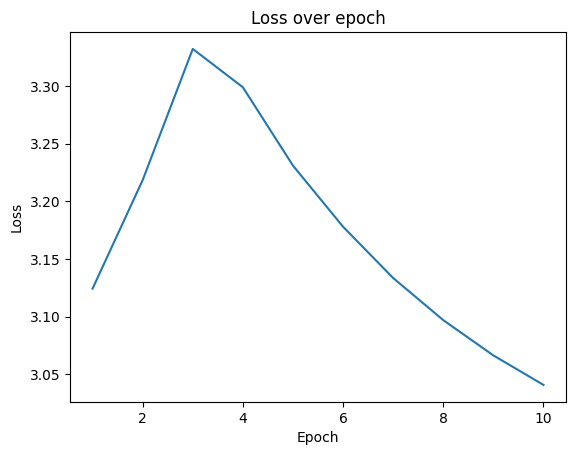

Accuracy = 0.7638


In [156]:
# Visualize loss during training
plot_loss_over_epoch(losses, epochs)

# Determine accuracy of the network 
acc = nn.test()

In [158]:
"""
Export weights
"""

import json

interp_weights = {
    'h1': nn.hiddenLayer1.weights.tolist(),
    'h2': nn.hiddenLayer2.weights.tolist(),
    'o': nn.outputLayer.weights.tolist(),
}

interp_bias = {
    'h1': nn.hiddenLayer1.bias.tolist(),
    'h2': nn.hiddenLayer2.bias.tolist(),
    'o': nn.outputLayer.bias.tolist()
}

with open('interp_model_weights.json', 'w') as f:
    json.dump(interp_weights, f)
with open('interp_model_bias.json', 'w') as f:
    json.dump(interp_bias, f)